# Quick intro

This is a jupyter notebook for testing / coding. So far, each code block is a separate test; unlike an ordinary notebook, they are not meant to run sequentially.

Let's do MCMC:


Next, running "ei". This started out as a copy of Fritz's code but it's evolved into a working version of ours.

base:Yes, I will run. line 5 8 :
Reloading polytopize.
eiresults/scenario_N527.csv from file
svi.step(... line 41 1 : 0 17.566666666666666 torch.Size([30, 9])
guide:begin line 41 1 : 17.566666666666666 True
types? line 100 1 : [torch.float64, torch.float64]
types? line 100 2 : [torch.float64, torch.float64]
types? line 100 3 : [torch.float64, torch.float64]
sds: tensor(0.6255, grad_fn=<StdBackward0>) tensor(0.5440, grad_fn=<AddBackward0>) tensor(0.5930, grad_fn=<StdBackward0>) tensor(0.6019, grad_fn=<SqrtBackward>)
sampled y line 514 1 : tensor([[ 681.4963,  374.1754, 1834.3283],
        [ 122.8623,   67.8277,  329.3099],
        [  97.6413,   53.9969,  261.3618]], grad_fn=<SelectBackward>)
model:end line 41 1 : 
    Size 0: [30, 3]; noNAN
    Size 1: [30, 3]; noNAN
    Size 2: [3]; noNAN
    Size 3: [3, 3]; noNAN
    Size 4: [30, 3, 3]; noNAN
    Size 5: [30, 3, 3]; noNAN
lp:  line 41 1 : tensor(-10321633.9962, grad_fn=<AddBackward0>) tensor(1.5291, grad_fn=<AddBackward0>) 761
ps2
gui

epoch 20 loss = 4.40E+07, mean_loss=5.29E+07; sds = {'rc': 0.9003245237006247};
 logitstar = tensor([[-0.2100, -0.1374,  0.3474],
        [-0.0139, -0.0139,  0.0277],
        [-0.0911, -0.1638,  0.2549]], grad_fn=<AddBackward0>)
types? line 100 64
sampled y line 514 128
sds: tensor(0.4237, grad_fn=<StdBackward0>) tensor(0.3290, grad_fn=<AddBackward0>) tensor(0.3599, grad_fn=<StdBackward0>) tensor(0.3773, grad_fn=<SqrtBackward>)
ps2
 ecstar = tensor([-0.1550, -0.1550], grad_fn=<SliceBackward>)
epoch 30 loss = 3.44E+07, mean_loss=5.23E+07; sds = {'rc': 0.8564151788095237};
 logitstar = tensor([[-0.3100, -0.2327,  0.5427],
        [-0.0150, -0.0150,  0.0301],
        [-0.1400, -0.2172,  0.3572]], grad_fn=<AddBackward0>)
svi.step(... line 41 32
guide:begin line 41 32
lp:  line 41 32
guide:end line 41 32
model:end line 41 64
sds: tensor(0.3526, grad_fn=<StdBackward0>) tensor(0.2667, grad_fn=<AddBackward0>) tensor(0.2950, grad_fn=<StdBackward0>) tensor(0.2997, grad_fn=<SqrtBackward>)
ps2
 ec

 ecstar = tensor([ 0.1266, -0.4204], grad_fn=<SliceBackward>)
epoch 190 loss = 4.26E+07, mean_loss=4.59E+07; sds = {'rc': 0.5130926942395764};
 logitstar = tensor([[-0.0736, -1.0300,  1.1036],
        [ 0.4594,  0.2177, -0.6771],
        [-0.0061, -0.4490,  0.4551]], grad_fn=<AddBackward0>)
sds: tensor(0.0939, grad_fn=<StdBackward0>) tensor(0.0140, grad_fn=<AddBackward0>) tensor(0.0049, grad_fn=<StdBackward0>) tensor(0.0448, grad_fn=<SqrtBackward>)
ps2
 ecstar = tensor([ 0.1450, -0.4181], grad_fn=<SliceBackward>)
epoch 200 loss = 4.81E+07, mean_loss=4.57E+07; sds = {'rc': 0.5165892746525922};
 logitstar = tensor([[-0.0508, -1.0327,  1.0835],
        [ 0.4593,  0.2101, -0.6694],
        [ 0.0265, -0.4318,  0.4052]], grad_fn=<AddBackward0>)
sds: tensor(0.0754, grad_fn=<StdBackward0>) tensor(0.0190, grad_fn=<AddBackward0>) tensor(0.0082, grad_fn=<StdBackward0>) tensor(0.0628, grad_fn=<SqrtBackward>)
ps2
 ecstar = tensor([ 0.1508, -0.4212], grad_fn=<SliceBackward>)
epoch 210 loss = 4.97E+0

        [ 0.1050, -0.4279,  0.3229]], grad_fn=<AddBackward0>)
sds: tensor(0.0955, grad_fn=<StdBackward0>) tensor(0.0205, grad_fn=<AddBackward0>) tensor(0.0092, grad_fn=<StdBackward0>) tensor(0.0528, grad_fn=<SqrtBackward>)
ps2
 ecstar = tensor([ 0.1710, -0.4102], grad_fn=<SliceBackward>)
epoch 370 loss = 5.33E+07, mean_loss=4.33E+07; sds = {'rc': 0.5212130612675312};
 logitstar = tensor([[-0.0444, -1.0411,  1.0855],
        [ 0.4701,  0.2333, -0.7034],
        [ 0.0873, -0.4228,  0.3355]], grad_fn=<AddBackward0>)
sds: tensor(0.1041, grad_fn=<StdBackward0>) tensor(0.0155, grad_fn=<AddBackward0>) tensor(0.0044, grad_fn=<StdBackward0>) tensor(0.0393, grad_fn=<SqrtBackward>)
ps2
 ecstar = tensor([ 0.1613, -0.4170], grad_fn=<SliceBackward>)
epoch 380 loss = 3.78E+07, mean_loss=4.31E+07; sds = {'rc': 0.5225091663106228};
 logitstar = tensor([[-0.0611, -1.0521,  1.1132],
        [ 0.4493,  0.2205, -0.6698],
        [ 0.0958, -0.4194,  0.3236]], grad_fn=<AddBackward0>)
sds: tensor(0.0847, grad

epoch 540 loss = 4.27E+07, mean_loss=4.24E+07; sds = {'rc': 0.5134942872464618};
 logitstar = tensor([[-0.0603, -1.0419,  1.1022],
        [ 0.4373,  0.2229, -0.6602],
        [ 0.1268, -0.4429,  0.3160]], grad_fn=<AddBackward0>)
sds: tensor(0.0972, grad_fn=<StdBackward0>) tensor(0.0258, grad_fn=<AddBackward0>) tensor(0.0112, grad_fn=<StdBackward0>) tensor(0.0492, grad_fn=<SqrtBackward>)
ps2
 ecstar = tensor([ 0.1694, -0.4208], grad_fn=<SliceBackward>)
epoch 550 loss = 4.35E+07, mean_loss=4.25E+07; sds = {'rc': 0.512601551737523};
 logitstar = tensor([[-0.0600, -1.0420,  1.1020],
        [ 0.4379,  0.2249, -0.6628],
        [ 0.1302, -0.4452,  0.3150]], grad_fn=<AddBackward0>)
ec_then_erc_star:
tensor([[ 0.1694, -0.4208],
        [-0.2294, -0.6212],
        [ 0.2686,  0.6456]], grad_fn=<SliceBackward>) (10 elems)
globalpsi:
tensor([0.0572, 0.0625, 0.0752, 0.0708, 0.0569, 0.0611],
       grad_fn=<SliceBackward>) (10 elems)
logsdrcstar:
-0.6682564378668867
precinctpsi:
tensor([0.1479, 0.

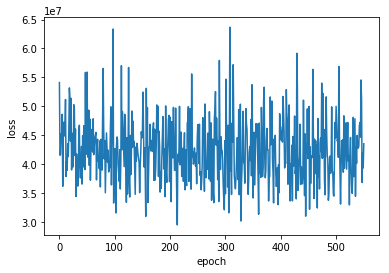

In [7]:
from importlib import reload
import ei_multisample #import *
reload(ei_multisample)
from ei_multisample import *
import cProfile as profile

#ec,erc = legible_values(3,3)
#print(ec,"\n",erc,"\n",ec+erc)
inits = good_inits(0.)
#del inits["ercstar_raw"]
%prun result = trainGuide(nsamps=5)#inits = inits)


.

.

.

Now, "toypyro", a minimal model to narrow in on and reproduce any bugs.


In [4]:
from importlib import reload
import ei2 #import *
reload(ei2)
from ei2 import *
import cProfile as profile

inits = dict() #good_inits()
#del inits["ercstar_raw"]
#%prun result = trainGuide(inits = inits)

NCparams = EIData.load("NC_Data/NC_2016_statewide_alpha_and_beta.csv")
print(NCparams.alpha + NCparams.beta)
#print("components")
#print(NCparams.alpha)
#
print(NCparams.beta)


base:Yes, I will run. line 5 5 :
Reloading polytopize.
tensor([[ 0.0500, -0.9100,  1.2200],
        [ 0.2100,  0.0100, -0.9500],
        [ 0.3400, -0.5400,  0.5800]])
components
tensor([ 0.2000, -0.4800,  0.2800])
tensor([[-0.1500, -0.4300,  0.9400],
        [ 0.0100,  0.4900, -1.2300],
        [ 0.1400, -0.0600,  0.3000]])


# Testing hessian transparency

In [18]:
import torch
ts = torch.tensor
os = torch.ones
zs = torch.zeros
from importlib import reload
import myhessian
reload(myhessian)

t1 = os(2,2,requires_grad=True)
r = torch.sum(t1 * t1 * t1)

h = myhessian.hessian(r,t1)
print("hess",h)
r2 = torch.sum(h * h)
[r3] = torch.autograd.grad(r,t1,create_graph=True,retain_graph=True)
print("d ",r3)
print("Σd ",torch.sum(r3))
[r4] = torch.autograd.grad(torch.sum(r3),t1,create_graph=True,retain_graph=True)
print("dΣdΣd ",torch.autograd.grad(torch.sum(r4),t1,create_graph=True,retain_graph=True))
print(torch.autograd.grad(r2,t1))

hess tensor([[6., 0., 0., 0.],
        [0., 6., 0., 0.],
        [0., 0., 6., 0.],
        [0., 0., 0., 6.]], grad_fn=<CopySlices>)
d  tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
Σd  tensor(12., grad_fn=<SumBackward0>)
dΣdΣd  (tensor([[6., 6.],
        [6., 6.]]),)
(tensor([[72., 72.],
        [72., 72.]]),)


In [4]:
import sys
import hessian

from importlib import reload
import polytopize #import *
reload(polytopize)
from polytopize import *

import tests


Yes, I will run.
Yes, I will run.
ge fail
loc tensor([[ 0.3147],
        [ 2.4440],
        [-4.0535],
        [ 2.2007]])
polytopedLoc tensor([[ 2.1063e-01,  2.1136e-02],
        [ 2.8514e-01, -1.8626e-09],
        [ 3.4959e-01,  9.9957e-02],
        [ 3.5462e-01,  1.1892e-02],
        [ 2.5462e+00,  3.2228e-01]])
ge fail
loc tensor([[-5.8855],
        [-5.2805],
        [ 5.4654],
        [ 0.1889]])
polytopedLoc tensor([[ 2.8885e-01,  1.1871e+00],
        [ 8.5629e-01,  2.0505e+00],
        [ 3.9984e-01, -1.4901e-08],
        [ 9.5542e-01,  1.5538e+00],
        [ 1.0063e+00,  9.9522e-01]])
Reloading cmult...
callable? <bound method TorchDistributionMixin.__call__ of Multinomial()>
callable? <bound method TorchDistributionMixin.__call__ of TorchCMult()>
Sampling multinomial: tensor([1., 2.])
Sampling cm2: tensor([0., 3.])
tensor(5.6022, grad_fn=<NegBackward>) tensor([[112.2500]])


# Test rank1torch (to get yhat from pi,n,v)

In [10]:
from importlib import reload
import rank1torch #import *
reload(rank1torch)
from rank1torch import *

test_solver()

Testing optimize_Q (50 tests): 
R=3, C=5, tolerance=0.001
Oh no! In test 3, Q has some negative entries:
	 trueQ[2][4]=0.00010659269901225343, 
	     Q[2][4]=-0.00021605131041724235
Oh no! In test 5, Q has some negative entries:
	 trueQ[1][4]=0.00011974151857430115, 
	     Q[1][4]=-1.1631345842033625e-06
Oh no! In test 8, Q has some negative entries:
	 trueQ[0][1]=2.882161788875237e-05, 
	     Q[0][1]=-0.0004783869662787765
Oh no! In test 15, Q has some negative entries:
	 trueQ[2][3]=0.0007846675580367446, 
	     Q[2][3]=-6.166117964312434e-05
Oh no! In test 28, Q has some negative entries:
	 trueQ[0][4]=8.13114020274952e-05, 
	     Q[0][4]=-0.00018321917741559446
Oh no! In test 40, Q has some negative entries:
	 trueQ[2][3]=0.00032634526723995805, 
	     Q[2][3]=-0.000617634505033493
Oh no! In test 47, Q has some negative entries:
	 trueQ[2][1]=0.00017936740186996758, 
	     Q[2][1]=-0.00041433278238400817
Oh no! In test 48, Q has some negative entries:
	 trueQ[0][0]=4.52485837740823

## Overview

Most SVI problems in pyro are coded as a model, a generic guide (such as: multivariate Gaussian in all parameters), and specific observations/data (passed as arguments to svi.step). For EI, that's going to be different; the observations are going to be built into the guide function, leaving nothing to include in the "data" argument to svi.step.

That means there is a lot of work for the guide to do. As usual, it must establish reasonable distributional families for the posterior of each of the hyperparameters. But for the latent parameters, the job of the guide is to take a "relative strength" number for each race/candidate/precinct combo, and turn that into a number of votes for each combo, such that those numbers obey all the constraints set by observations. This means that for each precinct (considered separately), the latent guide must:

-Find the "center point" where candidate preference is independent of race.

-Find the "basis vectors" (actually, there are more than enough of them to form a basis) which determine the directions to move in the space.

-For any given set of "relative strengths" which is a distance $d$ in a direction $\theta$, find the first constraint violated when moving in that direction, and the distance $r$ between the origin and that constraint.

-Project the "relative strengths" onto the numbers of votes, by moving $r(1-e^{-d})$ in direction $\theta$.

#### a = zs(2,2,2,2)
a[0,1,1,1] = 2
print(a[1,1])
print(a[0,1])
print(torch.max(a))
print(torch.distributions.exponential.Exponential(ts([1])).sample(4))